In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
from model import Model2head
import utils

In [2]:
model_path = 'testing_files\\2head_1\\models\\model_epoch-3000_.h5'
model = Model2head(model_path)

In [3]:
x = np.random.random((64,64,1))
y = model.test(x)

In [4]:
y

(1, [])

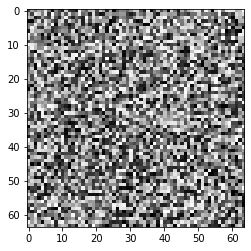

In [5]:
plt.imshow(tf.concat([x,x,x], axis=-1))

In [6]:
imb, test_img = utils.load_img('testing_files\\data\\test_img_64\\7_0_30_0.jpg', (64,64))

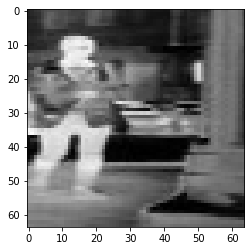

In [7]:
plt.imshow(tf.concat([test_img, test_img, test_img], axis=-1))

In [8]:
y = model.test(test_img)

In [9]:
y

(0,
 array([-2.9597744e-02,  7.0034866e+00,  2.7843658e+01,  5.3800297e+01],
       dtype=float32))

In [1]:
!python run_preds.py -c testing_files\cfgs\json_cfg.json

Загружаю датасет
Датасет загружен
количество tp изображений: 527
количество tp изображений: 527

Имя модели: model_epoch-01.h5
Прогон тестового набора...

Имя модели: model_epoch-03.h5
Прогон тестового набора...

Имя модели: model_epoch-04.h5
Прогон тестового набора...

Имя модели: model_epoch-05.h5
Прогон тестового набора...

Имя модели: model_epoch-08.h5
Прогон тестового набора...

Имя модели: model_epoch-102.h5
Прогон тестового набора...

Имя модели: model_epoch-139.h5
Прогон тестового набора...

Имя модели: model_epoch-14.h5
Прогон тестового набора...

Имя модели: model_epoch-141.h5
Прогон тестового набора...

Имя модели: model_epoch-148.h5
Прогон тестового набора...

Имя модели: model_epoch-17.h5
Прогон тестового набора...

Имя модели: model_epoch-19.h5
Прогон тестового набора...

Имя модели: model_epoch-3000.h5
Прогон тестового набора...

Имя модели: model_epoch-31.h5
Прогон тестового набора...

Имя модели: model_epoch-33.h5
Прогон тестового набора...

Имя модели: model_epoch-54.

In [13]:
!python check_pred_data.py -c testing_files\cfgs\json_cfg.json

Предикты модели model_epoch-012021-03-26 15:50:37.718881: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll

Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели model_epoch-03
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели model_epoch-04
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели model_epoch-05
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели model_epoch-08
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели model_epoch-102
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели model_epoch-139
Тип данных: tp
Количество изображений: 527
Тип данных: bg
Количество изображений: 527
Предикты модели model_epoch-14
Тип

In [14]:
!python calculate_metrics.py -c testing_files\cfgs\json_cfg.json

    Произвожу расчет порога модели model_epoch-01^
     Загружаю данные...
     Произвожу расчет и оценку...
[527, 0, 527, 0]
     Сохранение результатов
    Произвожу расчет порога модели model_epoch-03^
     Загружаю данные...
     Произвожу расчет и оценку...
[211, 316, 6, 521]
     Сохранение результатов
    Произвожу расчет порога модели model_epoch-04^
     Загружаю данные...
     Произвожу расчет и оценку...
[300, 227, 0, 527]
     Сохранение результатов
    Произвожу расчет порога модели model_epoch-05^
     Загружаю данные...
     Произвожу расчет и оценку...
[523, 4, 24, 503]
     Сохранение результатов
    Произвожу расчет порога модели model_epoch-08^
     Загружаю данные...
     Произвожу расчет и оценку...
[524, 3, 7, 520]
     Сохранение результатов
    Произвожу расчет порога модели model_epoch-102^
     Загружаю данные...
     Произвожу расчет и оценку...
[524, 3, 0, 527]
     Сохранение результатов
    Произвожу расчет порога модели model_epoch-139^
     Загружаю данн

In [30]:
import numpy as np
import pandas as pd
import os
import matplotlib.pylab as plt
import utils

In [32]:
acc_json_names = os.listdir('testing_files\\2head_1\\results\\json_acc_data')
auc_json_names = os.listdir('testing_files\\2head_1\\results\\json_roc_auc_data')
result_dir = 'testing_files\\2head_1\\results'

In [56]:
def get_acc_model_name(json_name):
    return json_name[16:].split('.')[0]

def get_auc_model_name(json_name):
    return json_name[19:].split('.')[0]

def load_metrics(acc_json_names, auc_json_names, result_dir):
    acc_dir = os.path.join(result_dir, 'json_acc_data')
    auc_dir = os.path.join(result_dir, 'json_roc_auc_data')
    num_models = len(acc_json_names)
    metric_data = {}
    for i in range(num_models):
        acc_json_name = acc_json_names[i]
        auc_json_name = auc_json_names[i]
        model_name = int(acc_json_name.split('-')[-1].split('.')[0])
        acc_pth = os.path.join(acc_dir, acc_json_name)
        auc_pth = os.path.join(auc_dir, auc_json_name)
        metric_data[model_name] = {'acc': utils.get_json_data(acc_pth)['accuracy'], 'auc': utils.get_json_data(auc_pth)['auc']}
    return metric_data

def get_acc_auc(metric_data, epochs):
    acc = []
    auc = []
    for epoch in epochs:
        acc.append(metric_data[epoch]['acc'])
        auc.append(metric_data[epoch]['auc'])
    return acc, auc 

In [49]:
metric_data = load_metrics(acc_json_names, auc_json_names, result_dir)

In [47]:
acc_json_names[0].split('-')[-1].split('.')[0]

'01'

In [50]:
metric_data

{1: {'acc': 0.5, 'auc': 0.5},
 3: {'acc': 0.6944971537001897, 'auc': 0.6944971537001898},
 4: {'acc': 0.784629981024668, 'auc': 0.784629981024668},
 5: {'acc': 0.9734345351043643, 'auc': 0.9734345351043643},
 8: {'acc': 0.9905123339658444, 'auc': 0.9905123339658443},
 102: {'acc': 0.9971537001897534, 'auc': 0.9971537001897532},
 139: {'acc': 0.9952561669829222, 'auc': 0.9952561669829222},
 14: {'acc': 0.99146110056926, 'auc': 0.99146110056926},
 141: {'acc': 0.9962049335863378, 'auc': 0.9962049335863378},
 148: {'acc': 0.9952561669829222, 'auc': 0.9952561669829222},
 17: {'acc': 0.9924098671726755, 'auc': 0.9924098671726753},
 19: {'acc': 0.9943074003795066, 'auc': 0.9943074003795065},
 3000: {'acc': 0.9971537001897534, 'auc': 0.9971537001897532},
 31: {'acc': 0.9943074003795066, 'auc': 0.9943074003795066},
 33: {'acc': 0.9943074003795066, 'auc': 0.9943074003795065},
 54: {'acc': 0.9971537001897534, 'auc': 0.9971537001897532},
 96: {'acc': 0.9971537001897534, 'auc': 0.9971537001897532}

In [62]:
epochs = list(metric_data.keys())
epochs = sorted(epochs)

In [57]:
acc, auc = get_acc_auc(metric_data, epochs)

In [61]:
epochs[:-2]

[1, 3, 4, 5, 8, 102, 139, 14, 141, 148, 17, 19, 3000, 31, 33, 54, 96]

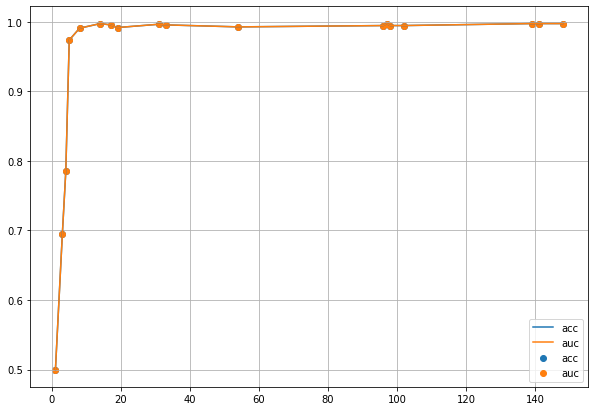

In [64]:
plt.figure(figsize=(10, 7))
plt.plot(epochs[:-1], acc[:-1], label='acc')
plt.scatter(epochs[:-1], acc[:-1], label='acc')
plt.plot(epochs[:-1], auc[:-1], label='auc')
plt.scatter(epochs[:-1], auc[:-1], label='auc')
plt.legend()
plt.grid('on')
plt.show()

In [65]:
ep_148_h = pd.read_csv('testing_files\\2head_1\\csv_conf\\model_epoch-148\\output_model_epoch-148_tp.csv')

In [67]:
ep_148_h[ep_148_h['iou'] > 0.75]

,Unnamed: 0,img_name,max_conf,iou,box
0,0,0_0_40_0.jpg,1,0.890334,"[0.07875128090381622, 13.354228973388672, 30.2..."
1,1,100_0_40_3.jpg,1,0.755716,"[0.21201901137828827, 0.4150735139846802, 18.4..."
2,2,102_0_40_3.jpg,1,0.937291,"[0.19020916521549225, 0.5080332159996033, 22.9..."
3,3,106_0_30_0.jpg,1,0.908680,"[0.05623526871204376, 11.823785781860352, 21.7..."
4,4,109_0_40_4.jpg,1,0.924533,"[16.06686782836914, 6.346083164215088, 45.4990..."
...,...,...,...,...,...
521,521,v8_4_0_40_0.jpg,1,0.851174,"[0.09611405432224274, 16.632667541503906, 25.7..."
522,522,v8_4_0_40_2.jpg,1,0.868929,"[34.159584045410156, 0.3648120164871216, 62.35..."
524,524,v8_8_0_30_0.jpg,1,0.956129,"[0.007352277636528015, 7.257312774658203, 33.8..."
525,525,v8_8_0_40_4.jpg,1,0.838216,"[16.088451385498047, 9.636392593383789, 44.075..."
